<a href="https://colab.research.google.com/github/rabnawaz172/Maize_2/blob/main/MAize_27_september.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: # Define paths
# # Assuming your dataset is in a folder named 'Dataset' in your Google Drive
# dataset_dir = '/content/drive/My Drive/Dataset'
# # ImageDataGenerator for preprocessing and augmenting data
# datagen = ImageDataGenerator(    rescale=1.0/255.0,
#     validation_split=0.2,  # Split data into training and validation sein the code shown impact of each augumentation technique on at least 20 images

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive



# Define paths
# Assuming your dataset is in a folder named 'Dataset' in your Google Drive
dataset_dir = '/content/drive/My Drive/Maiz_4'
# ImageDataGenerator for preprocessing and augmenting data
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.25,  # Split data into training and validation sets
    # Add augmentation techniques here:
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,

    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),  # Resize images to a specific size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Visualize augmented images (optional)
x, y = next(train_generator)
for i in range(0, 20):
    image = x[i]
    plt.imshow(image)
    plt.show()


Found 666 images belonging to 5 classes.
Found 164 images belonging to 5 classes.


In [ ]:
# prompt: now train a model using processed image define in previous steps using CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer with number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 745ms/step - accuracy: 0.2373 - loss: 2.5628 - val_accuracy: 0.3255 - val_loss: 1.4773
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 334ms/step - accuracy: 0.3949 - loss: 1.3768 - val_accuracy: 0.5000 - val_loss: 1.1560
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.5458 - loss: 1.1016 - val_accuracy: 0.5802 - val_loss: 1.0699
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.6109 - loss: 0.9434 - val_accuracy: 0.7453 - val_loss: 0.7337
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.6565 - loss: 0.7982 - val_accuracy: 0.7217 - val_loss: 0.6469
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 531ms/step - accuracy: 0.7607 - loss: 0.6366 - val_accuracy: 0.7972 - val_loss: 0.5231
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 336ms/step - accuracy: 0.7337 - loss: 0.6098 - val_accuracy: 0.6745 - val_loss: 0.6192
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 470ms/step - accuracy: 0.7400 - loss: 0.6440 - val_accur

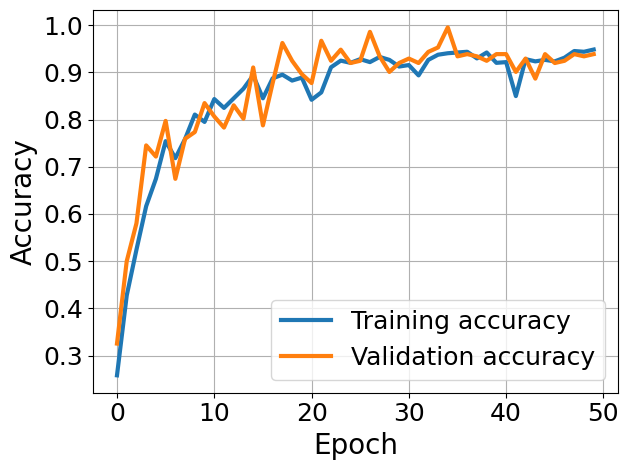

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

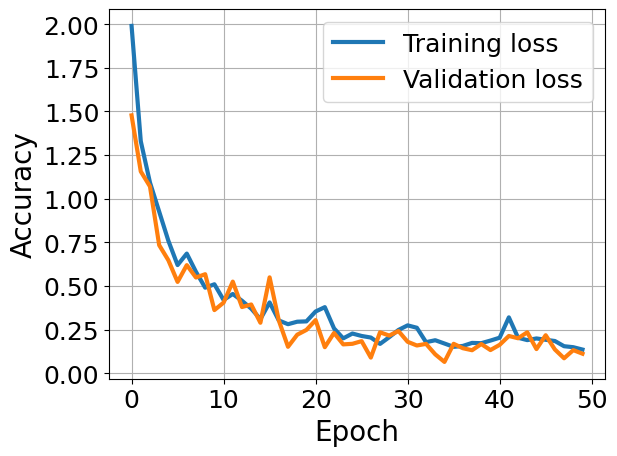

In [ ]:
# prompt: in the plots below code increase the width of lines

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy', linewidth=3) # Increased linewidth
plt.plot(epochs, val_acc, label='Validation accuracy', linewidth=3) # Increased linewidth

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
# Save the plot to a high-resolution PNG file
plt.savefig('acc_plot.png', dpi=300)

# Download the plot file from Colab

plt.tight_layout();
plt.show()

plt.plot(epochs, loss,  label='Training loss', linewidth=3) # Increased linewidth
plt.plot(epochs, val_loss,  label='Validation loss', linewidth=3) # Increased linewidth

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=18)

plt.grid(True)



# Save the plot to a high-resolution PNG file
plt.savefig('loss_plot.png', dpi=300)

# Download the plot file from Colab
from google.colab import files
files.download('loss_plot.png')



plt.show()






In [ ]:
import os

model_save_dir = '/content/drive/My Drive/SavedModel'  # Directory to save the model


# Save the model
model_save_path = os.path.join(model_save_dir, 'Maiz_150_model.h5')
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /content/drive/My Drive/SavedModel/Maiz_150_model.h5


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 250 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
Results saved to /content/drive/My Drive/SavedModel/prediction_results.csv
Filename: AFSON-5190/(1).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(10).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(11).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(12).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(13).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(14).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(143).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(15).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(16).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(17).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(18).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(19).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(2).jpeg, Actual Class: 0, Predicted Class: 0
Fi

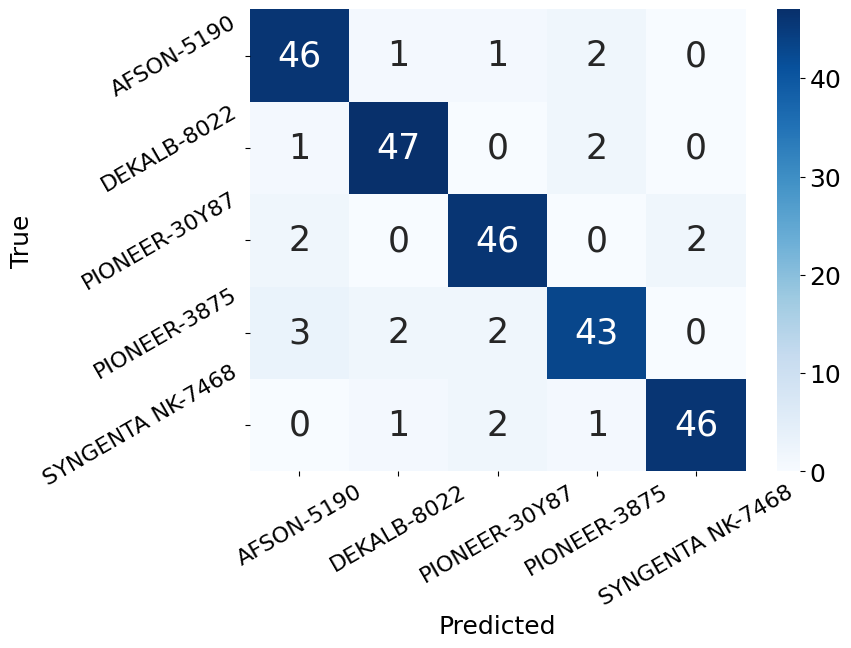

Classification Report:
                   precision    recall  f1-score   support

      AFSON-5190       0.88      0.92      0.90        50
     DEKALB-8022       0.92      0.94      0.93        50
   PIONEER-30Y87       0.90      0.92      0.91        50
    PIONEER-3875       0.90      0.86      0.88        50
SYNGENTA NK-7468       0.96      0.92      0.94        50

        accuracy                           0.91       250
       macro avg       0.91      0.91      0.91       250
    weighted avg       0.91      0.91      0.91       250



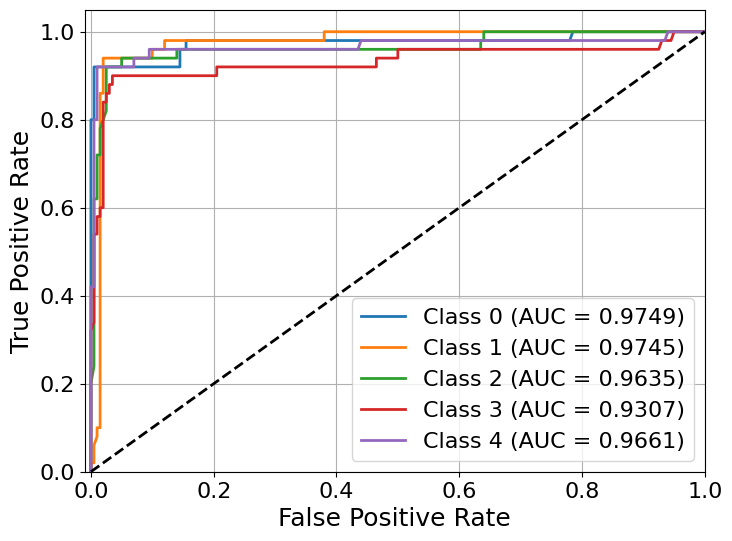

Evaluation complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Google Drive

# Mount Google Drive
drive.mount('/content/drive')
# Define paths
dataset_dir = '/content/drive/My Drive/Maiz_6'
model_save_dir = '/content/drive/My Drive/SavedModel'
model_save_path = os.path.join(model_save_dir, 'Maiz_150_model.h5')



# Parameters
num_classes = 5
target_size = (150, 150)
batch_size = 5

# ImageDataGenerator for preprocessing data
datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load and preprocess data
data = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the saved model
model = load_model(model_save_path)

# Get a list of all image files found by the generator
all_image_files = data.filenames

# Filter out any files that don't actually exist
existing_image_files = [f for f in all_image_files if os.path.exists(os.path.join(dataset_dir, f))]

# Instead of passing `filenames` to `flow_from_directory`,
# you can update the `filenames` attribute of the existing `data` object
data.filenames = existing_image_files
# You might also need to adjust `data.samples`, `data.n`, etc. accordingly
data.samples = len(existing_image_files) # Update the number of samples
# Assuming you have calculated `y_true` based on `existing_image_files`
# ...

# Get true labels and predicted labels using the updated data generator
y_true = data.classes
y_pred_probs = model.predict(data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Filename': data.filenames,
    'Actual Class': y_true,
    'Predicted Class': y_pred
})

# Save results to CSV
results_csv_path = os.path.join(model_save_dir, 'prediction_results.csv')
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to {results_csv_path}")

# Print each prediction result
for index, row in results_df.iterrows():
    print(f"Filename: {row['Filename']}, Actual Class: {row['Actual Class']}, Predicted Class: {row['Predicted Class']}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_labels):
    plt.figure(figsize=(8, 6))
    htm=sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,annot_kws={"size": 25})
    cbar = htm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('True', fontsize=18)

    plt.xticks(fontsize=16,rotation=30)
    plt.yticks(fontsize=16,rotation=30)
    plt.show()

plot_confusion_matrix(conf_matrix, list(data.class_indices.keys()))

# Print classification report
class_report = classification_report(y_true, y_pred, target_names=list(data.class_indices.keys()))
print("Classification Report:\n", class_report)

# Binarize the true labels for ROC calculation
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Plot ROC curves
def plot_roc_curve(y_true_binarized, y_pred_probs, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)

    plt.legend(loc="lower right", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.show()

plot_roc_curve(y_true_binarized, y_pred_probs, num_classes)

print("Evaluation complete.")



In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,108,689 (217.85 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,072,460 (145.23 MB)

**Effeceitn Net**

In [ ]:
# prompt: like above model also train a effecient net based model

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
from google.colab import files
from tensorflow.keras.models import load_model
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Google Drive


# Install EfficientNet if not already installed
!pip install -U efficientnet

# Import EfficientNet
import efficientnet.tfkeras as efn


# Create the EfficientNet model
base_model = efn.EfficientNetB0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

model_1 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# ... (Rest of the code for plotting, saving, and evaluating the model is the same as before)

# Save the model
model_save_dir = '/content/drive/My Drive/SavedModel'  # Directory to save the model
model_save_path = os.path.join(model_save_dir, 'Maiz_EfficientNetB0_model.h5')
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7304 - loss: 0.7267 - val_accuracy: 0.5266 - val_loss: 1.4341
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.9169 - loss: 0.2037 - val_accuracy: 0.6272 - val_loss: 1.0282
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9256 - loss: 0.1918 - val_accuracy: 0.4970 - val_loss: 1.5055
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9148 - loss: 0.1654 - val_accuracy: 0.5385 - val_loss: 1.3717
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9061 - loss: 0.1989 - val_accuracy: 0.5621 - val_loss: 0.9937
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9429 - loss: 0.1564 - val_accuracy: 0.7929 - val_loss: 0.6115
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 0.9379 - loss: 0.1247 - val_accuracy: 0.8580 - val_loss: 0.4448
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 376ms/step - accuracy: 0.9391 - loss: 0.1139 - val_accura

Model saved to /content/drive/My Drive/SavedModel/Maiz_EfficientNetB0_model.h5


In [ ]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 5, 5, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,083,877 (46.10 MB)

 Trainable params: 4,013,953 (15.31 MB)

 Non-trainable params: 42,016 (164.12 KB)

 Optimizer params: 8,027,908 (30.62 MB)

In [ ]:
# prompt: like above model also train a effecient net based model

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
from google.colab import files
from tensorflow.keras.models import load_model
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Google Drive


# Install EfficientNet if not already installed
!pip install -U efficientnet

# Import EfficientNet
import efficientnet.tfkeras as efn


# Create the EfficientNet model
base_model = efn.EfficientNetB0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

model_1 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# ... (Rest of the code for plotting, saving, and evaluating the model is the same as before)

# Save the model
model_save_dir = '/content/drive/My Drive/SavedModel'  # Directory to save the model
model_save_path = os.path.join(model_save_dir, 'Maiz_EfficientNetB0_model.h5')
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.7022 - loss: 0.7463 - val_accuracy: 0.2877 - val_loss: 2.9737
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 335ms/step - accuracy: 0.9108 - loss: 0.2328 - val_accuracy: 0.2736 - val_loss: 2.3650
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 333ms/step - accuracy: 0.9163 - loss: 0.2264 - val_accuracy: 0.6415 - val_loss: 0.9032
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 398ms/step - accuracy: 0.9556 - loss: 0.1374 - val_accuracy: 0.4670 - val_loss: 1.4889
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.9254 - loss: 0.1573 - val_accuracy: 0.4481 - val_loss: 1.4754
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.9151 - loss: 0.1931 - val_accuracy: 0.2783 - val_loss: 1.8904
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.9429 - loss: 0.1434 - val_accuracy: 0.3113 - val_loss: 1.7856
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - accuracy: 0.9444 - loss: 0.1357 - val_accurac

Model saved to /content/drive/My Drive/SavedModel/Maiz_EfficientNetB0_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

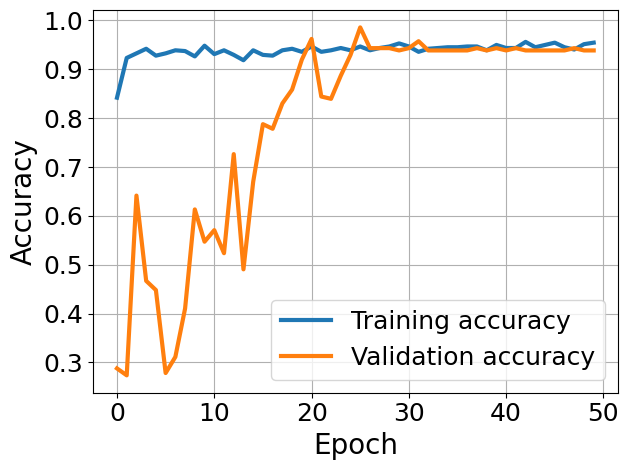

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

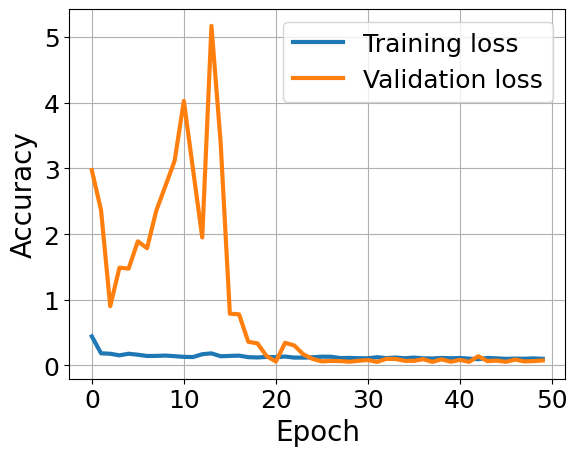

In [ ]:
import matplotlib.pyplot as plt
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy', linewidth=3) # Increased linewidth
plt.plot(epochs, val_acc, label='Validation accuracy', linewidth=3) # Increased linewidth

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
# Save the plot to a high-resolution PNG file
plt.savefig('acc_plot.png', dpi=300)

# Download the plot file from Colab
files.download('acc_plot.png')
plt.tight_layout();
plt.show()

plt.plot(epochs, loss,  label='Training loss', linewidth=3) # Increased linewidth
plt.plot(epochs, val_loss,  label='Validation loss', linewidth=3) # Increased linewidth

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=18)

plt.grid(True)



# Save the plot to a high-resolution PNG file
plt.savefig('loss_plot.png', dpi=300)

# Download the plot file from Colab
from google.colab import files
files.download('loss_plot.png')

In [ ]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 5, 5, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,083,877 (46.10 MB)

 Trainable params: 4,013,953 (15.31 MB)

 Non-trainable params: 42,016 (164.12 KB)

 Optimizer params: 8,027,908 (30.62 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

#drive.mount('/content/drive')

# Define the path to your saved model
model_save_path = '/content/drive/My Drive/SavedModel/Maiz_EfficientNetB0_model.h5'

# Load the model
loaded_model = load_model(model_save_path)

# Show model attributes (summary)
loaded_model.summary()

print('Model loaded successfully.')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,231 (72.62 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model loaded successfully.


Found 250 images belonging to 5 classes.
10/50 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Results saved to /content/drive/My Drive/SavedModel/prediction_results.csv
Filename: AFSON-5190/(1).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(10).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(11).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(12).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(13).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(14).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(143).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(15).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(16).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(17).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(18).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(19).jpeg, Actual Class: 0, Predicted Class: 0
Filename: AFSON-5190/(2).jpeg, Actual Class: 0, Predicted Class: 0
Fi

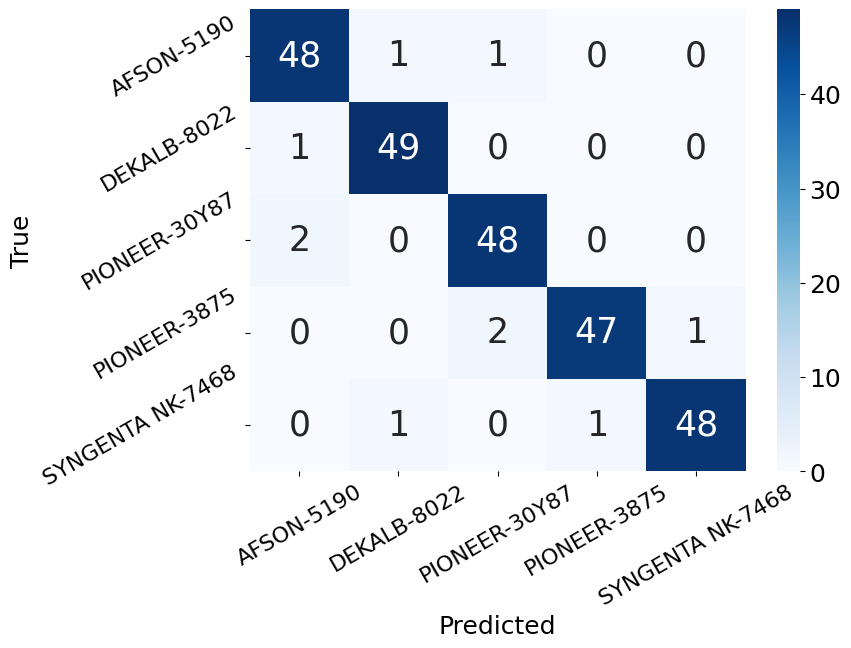

Classification Report:
                   precision    recall  f1-score   support

      AFSON-5190       0.94      0.96      0.95        50
     DEKALB-8022       0.96      0.98      0.97        50
   PIONEER-30Y87       0.94      0.96      0.95        50
    PIONEER-3875       0.98      0.94      0.96        50
SYNGENTA NK-7468       0.98      0.96      0.97        50

        accuracy                           0.96       250
       macro avg       0.96      0.96      0.96       250
    weighted avg       0.96      0.96      0.96       250



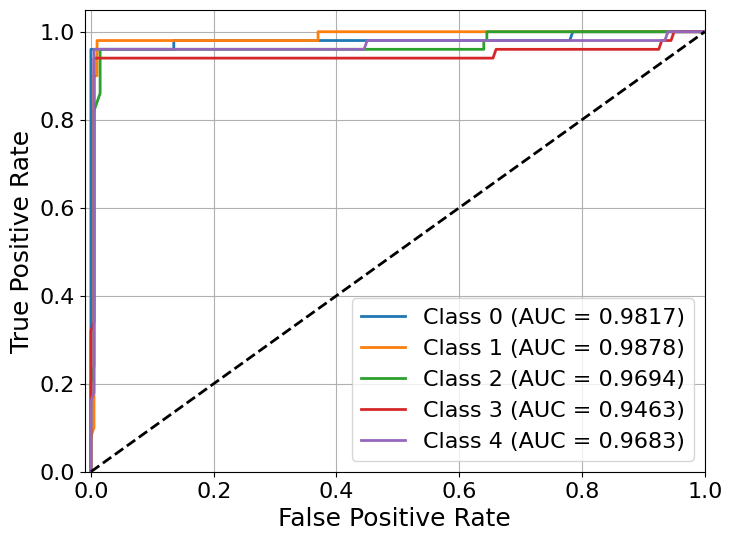

Evaluation complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize



# Parameters
num_classes = 5
target_size = (150, 150)
batch_size = 5

# ImageDataGenerator for preprocessing data
datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load and preprocess data
data = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the saved model


# Get true labels and predicted labels
y_true = data.classes
y_pred_probs = loaded_model.predict(data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Filename': data.filenames,
    'Actual Class': y_true,
    'Predicted Class': y_pred
})

# Save results to CSV
results_csv_path = os.path.join(model_save_dir, 'prediction_results.csv')
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to {results_csv_path}")

# Print each prediction result
for index, row in results_df.iterrows():
    print(f"Filename: {row['Filename']}, Actual Class: {row['Actual Class']}, Predicted Class: {row['Predicted Class']}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_labels):
    plt.figure(figsize=(8, 6))
    htm=sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,annot_kws={"size": 25})
    cbar = htm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('True', fontsize=18)

    plt.xticks(fontsize=16,rotation=30)
    plt.yticks(fontsize=16,rotation=30)
    plt.show()

plot_confusion_matrix(conf_matrix, list(data.class_indices.keys()))

# Print classification report
class_report = classification_report(y_true, y_pred, target_names=list(data.class_indices.keys()))
print("Classification Report:\n", class_report)

# Binarize the true labels for ROC calculation
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Plot ROC curves
def plot_roc_curve(y_true_binarized, y_pred_probs, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)

    plt.legend(loc="lower right", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.show()

plot_roc_curve(y_true_binarized, y_pred_probs, num_classes)

print("Evaluation complete.")